<div align="center">

# KODINGAN
## KELOMPOK 3 CAPSTONE AKM
### Semester ganjil 2023/2024

</div>

**Dosen Pembimbing** : Dr. Ir. Fahren Bukhari, M.Sc.

**Asisten Pembimbing** : Fitra Nuvus

**Anggota kelompok** :
- Sukri Arif Rafhida (G5401201062)
- Syahrul (G540121004)
- Hari Nurdianto (G540121089)
- Ana Nur Fitria (G540121013)
- Siti Nur Lathifah (G540121053)
- Muhammad Taufik I. (G540121025)
- Shafa Annisa S.D (G540121010)


### Soal
![image.png](attachment:09273899-a2ca-4669-b064-3f89df61a3ba.png)

# Pseudocode Coal Train Simulation

## Daftar Package yang Dibutuhkan

#### **Gunakan package `ConcurrentSim`**
> Kegunaan: Kerangka simulasi.

#### **Gunakan package `Distributions`**
> Kegunaan: Mengatur sebaran data.

#### **Gunakan package `ResumableFunctions`**
> Kegunaan: Mengontrol fungsi event.

#### **Gunakan package `Random`**
> Kegunaan: Mengatur fungsi-fungsi yang berkaitan dengan randomisasi.

#### **Gunakan package `Plots`**
> Kegunaan: Mengatur visualisasi statistik dan data.


## Inisiasi Seed untuk Randomizer

1. **Tetapkan Konstanta Seed**
  - **Nama Variabel**: `seed_1`
  - **Nilai**: `123`
  - **Tujuan**: Menjaga konsistensi hasil randomisasi.

2. **Buat Objek Randomizer**
  - **Tipe**: `MersenneTwister`
  - **Seed**: `seed_1`
  - **Tujuan**: Menggunakan algoritma Mersenne Twister untuk randomisasi.

3. **Tetapkan Seed Global**
  - **Fungsi**: `Random.seed!`
  - **Seed**: `seed_1`
  - **Tujuan**: Sinkronisasi seed di seluruh proses randomisasi untuk konsistensi hasil.


## Parameter untuk Simulasi Bongkar Muat Kereta

1. **Tetapkan Waktu Kedatangan Kereta**
  - **Variabel**: `arrival_rate`
  - **Nilai**: `10` jam
  - **Keterangan**: Rata-rata waktu kedatangan kereta.

2. **Tetapkan Waktu Pembongkaran Kereta**
  - **Batas Bawah**: `min_unloading_time` = `3.5` jam
  - **Batas Atas**: `max_unloading_time` = `4.5` jam
  - **Keterangan**: Waktu pembongkaran kereta.

3. **Tetapkan Waktu Kerja Kru**
  - **Batas Bawah**: `min_crew_time_left` = `6` jam
  - **Batas Atas**: `max_crew_time_left` = `11` jam
  - **Keterangan**: Waktu kerja Kru.

4. **Tetapkan Waktu Pemanggilan Kru**
  - **Batas Bawah**: `min_crew_replacement_time` = `2.5` jam
  - **Batas Atas**: `max_crew_replacement_time` = `3.5` jam
  - **Keterangan**: Waktu pemanggilan kru.

5. **Tetapkan Durasi Simulasi**
  - **Variabel**: `lengthOfSimulation`
  - **Nilai**: `720` jam (30 hari x 24 jam)
  - **Keterangan**: Durasi Simulasi berlangsung.


## Fungsi Distribusi Sebaran dalam Simulasi

1. **Fungsi Interarrival Time**
- **Deskripsi**: Menghasilkan waktu kedatangan kereta berikutnya.
- **Distribusi**: Eksponensial dengan rata-rata `arrival_rate`.
- **Implementasi**:
  - return nilai `arrival_rate * randexp(rng_load, Float64)`.

2. **Fungsi Unloading Time**
- **Deskripsi**: Menghasilkan waktu pembongkaran kereta.
- **Distribusi**: Uniform antara `min_unloading_time` dan `max_unloading_time`.
- **Implementasi**:
  - return nilai `rand(rng_load, Uniform(min_unloading_time, max_unloading_time))`.

3. **Fungsi Crew Remaining Time**
- **Deskripsi**: Menghasilkan waktu tersisa kerja kru.
- **Distribusi**: Uniform antara `min_crew_time_left` dan `max_crew_time_left`.
- **Implementasi**:
  - return nilai `rand(rng_load, Uniform(min_crew_time_left, max_crew_time_left))`.

4. **Fungsi Replacement Crew Time**
- **Deskripsi**: Menghasilkan waktu untuk pemanggilan kru baru.
- **Distribusi**: Uniform antara `min_crew_replacement_time` dan `max_crew_replacement_time`.
- **Implementasi**:
  - return nilai `rand(rng_load, Uniform(min_crew_replacement_time, max_crew_replacement_time))`.


## Definisi Struktur Data

### Struktur Data TrainStruct
- **Definisi Fields**
  - `busyTime`, `nTrain`, `occupied`, dll.: Berbagai field untuk menyimpan data kereta.
- **Fungsi Konstruktor TrainStruct**
  - Inisialisasi `TrainStruct` dengan nilai awal untuk semua fields.
  - Setiap field seperti `nLen`, `occupied`, `areaUnderQ`, dan lainnya diinisialisasi ke 0.
  - Fungsi ini dipanggil dengan parameter `sim` dari tipe `Simulation`.

### Struktur Data CrewStruct
- **Definisi Fields**
  - `worker`: Menyimpan resource kru.
  - `worktime` dan `replacetime`: Menyimpan waktu kerja dan waktu penggantian kru.
- **Fungsi Konstruktor CrewStruct**
  - Inisialisasi `CrewStruct` dengan nilai awal untuk semua fields.
  - `worker` diinisialisasi sebagai `Resource` dengan kapasitas 1.
  - `replacetime` dan `worktime` diinisialisasi ke 0.
  - Fungsi ini dipanggil dengan parameter `sim` dari tipe `Simulation`.


## Fungsi train_generator

- **Inisialisasi Fungsi train_generator**
  - Fungsi ini dijalankan dengan parameter `sim`, `name`, `ts`, `cs`, dan `station`.
- **Mengatur Loop Tanpa Akhir untuk Generasi Kereta**
  - Gunakan `while true` untuk terus menghasilkan kereta.
- **Bangkitkan wakru kerja kru diawal**
  - diawal simulasi waktu kerja kru dibangkitkan dengan `crew_remaining_time()`.
- **Menentukan Waktu Kedatangan Kereta Berikutnya**
  - Hitung `train_arrival` dan tunggu selama waktu tersebut.
- **Menghitung Interval Kedatangan Kereta**
  - Hitung interval antara kedatangan kereta saat ini dan terakhir.
- **Menyimpan Waktu Kedatangan Kereta**
  - Catat waktu kedatangan kereta di `ts.areaUnderQ`.
- **Mencetak Informasi Kedatangan Kereta**
  - Tambahkan counter kereta (`i`) setiap kali kereta baru tiba.
- **Memulai Proses Train untuk Kereta yang Datang**
  - Jalankan fungsi `Train` untuk setiap kereta yang tiba.
- **Memperbarui Waktu Idle Berdasarkan Interval Kedatangan**
  - Tambahkan interval kedatangan ke `ts.iddle`.
- **Memperbarui Waktu Kedatangan Terakhir**
  - Catat waktu kedatangan terakhir untuk perhitungan interval berikutnya.

## Fungsi Train

- **Inisialisasi Fungsi Train**
  - Fungsi ini dijalankan dengan parameter `sim`, `name`, `ts`, `cs`, `res`, dan `train_arrival`.
- **Menangani Antrian**
  - Jika resource (`res`) sedang digunakan (`ts.occupied == 1`):
    - Tambahkan 1 ke jumlah antrian (`ts.Quewe`).
    - Tambahkan 1 ke jumlah maksimum antrian (`ts.Quewe_max`).
- **Memperbarui Nilai Maksimum Antrian**
  - Jika nilai maksimum antrian saat ini (`ts.Max_Quewe`) lebih kecil dari jumlah maksimum antrian (`ts.Quewe_max`):
    - Set `ts.Max_Quewe` sama dengan `ts.Quewe_max`.
- **Menandai Penggunaan Resource**
  - Tambahkan 1 ke `ts.occupied` untuk menandai bahwa resource sedang digunakan.
- **Menyimpan Waktu Sebelum Proses**
  - Catat waktu saat ini dari simulasi (`sim`) sebagai `iddle_bfr`.
- **Memulai dan Menunggu Proses Train_process**
  - Jalankan fungsi `Train_process` sebagai proses baru.
  - Gunakan `@yield` untuk menunggu hingga `Train_process` selesai.
- **Menghitung dan Memperbarui Total Waktu Sistem**
  - Tambahkan selisih waktu saat ini (`now(sim)`) dan waktu antrian (`ts.areaUnderQ`) ke total waktu sistem (`ts.SystemTime`).
- **Memperbarui Waktu Maksimum Sistem**
  - Jika waktu sistem saat ini (`system_time`) lebih lama dari maksimum sebelumnya (`ts.MaxTime`):
    - Set `ts.MaxTime` sama dengan `system_time`.
- **Menangani Antrian dan Kondisi Kru**
  - Jika tidak ada resource yang digunakan (`ts.occupied == 0`):
    - Kurangi 1 dari jumlah maksimum antrian (`ts.Quewe_max`).
  - Jika jumlah maksimum antrian negatif:
    - Set `ts.Quewe_max` menjadi 0.
  - Jika antrian kosong (`ts.Quewe_max == 0`) atau waktu kerja kru habis (`cs.worktime <= 0`):
    - Mulai proses `crew_time_Queue`.

## Fungsi Train_process

- **Inisialisasi Fungsi Train_process**
  - Fungsi ini dijalankan dengan parameter `sim` (Simulasi), `name` (nama kereta), `ts` (struktur data kereta), `cs` (struktur data kru), `res` (resource), dan `train_arrival` (waktu kedatangan kereta).
- **Meminta Resource**
  - Gunakan `@yield request(res)` untuk menunggu resource tersedia.
- **Menyimpan Waktu Kerja Kru**
  - Catat waktu kerja kru saat ini (`kru_taime`) dari `cs.worktime`.
- **Menghitung Waktu Antrian Kereta**
  - Tambahkan selisih waktu saat ini dan waktu area antrian ke `ts.Qtime`.
- **Mencetak Informasi Permintaan Resource dan Mulai Proses Unload**
  - Hitung waktu untuk proses unload (`anlod_time`).
  - Mulai proses unload dengan `@process unload_proc`.
  - Tunggu hingga proses unload selesai dengan `@yield unloading_process`.
- **Melepaskan Resource**
  - Gunakan `@yield release(res)` untuk melepaskan resource.
- **Mencetak Informasi Setelah Proses Unload Selesai**
- **Mengurangi Jumlah Resource yang Digunakan**
  - Kurangi 1 dari `ts.occupied`.
- **Menyimpan Waktu Setelah Resource Dilepaskan**
  - Catat waktu saat ini (`iddle_after`) setelah resource dilepaskan.


## Fungsi unload_proc

- **Inisialisasi Fungsi unload_proc**
  - Fungsi ini dijalankan dengan parameter `sim`, `ts`, `cs`, dan `unloadtime`.
- **Menambahkan Waktu Unload**
  - Tambahkan waktu unload (`unloadtime`) ke total waktu sibuk (`ts.busyTime`).
  - Ini mengakumulasikan waktu yang dibutuhkan untuk proses unload.
- **Menghitung Jumlah Kereta yang Telah Di-unload**
  - Tambahkan satu ke total jumlah kereta (`ts.nTrain`) yang telah di-unload.
  - Ini menghitung jumlah kereta yang telah selesai di-unload.
- **Memulai Proses Waktu Kerja Kru**
  - Jalankan fungsi `crew_time` sebagai proses baru dengan parameter `sim`, `ts`, `cs`, dan `unloadtime`.
  - Fungsi `crew_time` akan mengelola waktu kerja kru selama proses unload.
- **Menunggu Proses Waktu Kerja Kru Selesai**
  - Gunakan `@yield` untuk menunggu sampai proses `crew_time` selesai.
  - Ini memastikan bahwa proses unload tidak berlanjut sampai proses `crew_time` telah selesai.

## Fungsi crew_time

- **Inisialisasi Fungsi crew_time**
  - Fungsi ini dijalankan dengan parameter `sim` (Simulasi), `ts` (struktur data kereta), `cs` (struktur data kru), dan `unloadtimes` (waktu unload).
- **Menyimpan dan Menghitung Waktu Kerja Kru**
  - Catat sisa waktu kerja kru (`sisa`) dari `cs.worktime`.
  - Hitung waktu kerja kru yang tersisa (`remaining_time`) setelah unloading.
- **Memperbarui Waktu Kerja Kru**
  - Set `cs.worktime` sama dengan `remaining_time`.
- **Menangani Kru Pengganti jika Waktu Kerja Habis**
  - Jika waktu kerja kru habis (`cs.worktime <= 0`):
    - Tunggu hingga waktu kerja kru selesai dengan `@yield timeout(sim, sisa)`.
    - Mencetak informasi bahwa waktu kru telah habis.
    - Mulai proses `get_crew` untuk memanggil kru pengganti dan tunggu hingga proses selesai.
- **Menunggu hingga Unloading Selesai jika Waktu Kerja Kru Belum Habis**
  - Jika waktu kerja kru masih ada, tunggu hingga unloading selesai dengan `@yield timeout(sim, unloadtimes)`.
  - Perbarui statistik terkait waktu kerja kru (`ts.hogout_0`).


## Fungsi get_crew

- **Inisialisasi Fungsi get_crew**
  - Fungsi ini dijalankan dengan parameter `sim` (Simulasi), `ts` (struktur data kereta), `cs` (struktur data kru), `left` (waktu tersisa), dan `unloadtimess` (total waktu unload).
- **Menambahkan Jumlah Resource yang Sedang digunakan**
  - Tambahkan 1 ke `ts.nLen`.
- **Meminta Resource untuk Kru**
  - Gunakan `@yield request(cs.worker)` untuk meminta resource kru.
- **Menyimpan Waktu Awal Pemanggilan Kru**
  - Catat waktu awal pemanggilan kru (`awal_panggil`).
- **Menunggu Kru Pengganti Tiba**
  - Gunakan `@yield timeout(sim, replacement_crew_time())` untuk menunggu kru pengganti.
- **Menghitung Durasi Pemanggilan Kru Pengganti**
  - Hitung durasi pemanggilan kru pengganti (`waktu_panggil`).
- **Menambahkan Waktu Pemanggilan Kru ke Total Waktu Hogout**
  - Tambahkan `waktu_panggil` ke `ts.hogout`.
- **Memperbarui Statistik Kru**
  - Tambahkan 1 ke `ts.hogout_1` dan `ts.hogout_2`.
- **Mencetak Informasi Kedatangan Kru Baru**
- **Memperbarui Waktu Kerja Kru**
  - Set `cs.worktime` dengan waktu kerja kru pengganti (`crew_remaining_time`).
- **Melepaskan Resource Kru**
  - Gunakan `@yield release(cs.worker)`.
- **Mengurangi Jumlah Resource yang digunakan**
  - Kurangi 1 dari `ts.nLen`.
- **Menghitung Sisa Waktu Unloading**
  - Hitung sisa waktu unloading (`lft`).
- **Menghitung Sisa Waktu Kerja Kru**
  - Hitung sisa waktu kerja kru (`nw_wt`).
- **Memperbarui Waktu Kerja Kru**
  - Set `cs.worktime` dengan sisa waktu kerja kru.
- **Menunggu Sisa Waktu Unloading Selesai**
  - Gunakan `@yield timeout(sim, lft)`.


## Fungsi crew_time_Queue

- **Inisialisasi Fungsi crew_time_Queue**
  - Fungsi ini dijalankan dengan parameter `sim`, `ts`, `cs`, dan `gettrain`.
- **Menyimpan dan Menghitung Waktu Kerja Kru**
  - Catat sisa waktu kerja kru saat ini (`sisa`) dari `cs.worktime`.
  - Hitung waktu kerja kru yang tersisa (`remaining_time`) setelah proses antrian.
- **Memperbarui Waktu Kerja Kru**
  - Set `cs.worktime` sama dengan `remaining_time`.
- **Menangani Kru Pengganti jika Waktu Kerja Habis Saat Antrian**
  - Jika waktu kerja kru habis (`cs.worktime <= 0`):
    - Tunggu hingga waktu kerja kru selesai dengan `@yield timeout(sim, sisa)`.
    - Mencetak informasi bahwa waktu kru telah habis.
    - Mulai proses `get_crew_Queue` untuk memanggil kru pengganti dan tunggu hingga proses selesai.
- **Memperbarui Statistik Kru**
  - Jika waktu kerja kru belum habis, tambahkan 1 ke `ts.hogout_0` dan kurangi 1 dari `ts.hogout_2`.


## Fungsi get_crew_Queue

- **Inisialisasi Fungsi get_crew_Queue**
  - Fungsi ini dijalankan dengan parameter `sim`, `ts`, `cs`, `left`, dan `gettrains`.
- **Meminta Resource untuk Kru**
  - Gunakan `@yield request(cs.worker)` untuk meminta resource kru.
- **Menyimpan Waktu Awal Pemanggilan Kru**
  - Catat waktu awal pemanggilan kru (`awal_panggil`).
- **Menunggu Kru Pengganti Tiba**
  - Gunakan `@yield timeout(sim, replacement_crew_time())` untuk menunggu kru pengganti.
- **Melepaskan Resource Kru**
  - Gunakan `@yield release(cs.worker)`.
- **Menghitung Durasi Pemanggilan Kru Pengganti**
  - Hitung durasi pemanggilan kru pengganti (`waktu_panggil`).
- **Menambahkan Waktu Pemanggilan Kru ke Total Waktu Hogout**
  - Tambahkan `waktu_panggil` ke `ts.hogout`.
- **Memperbarui Statistik Kru**
  - Tambahkan 1 ke `ts.hogout_1` dan `ts.hogout_2`.
- **Mencetak Informasi Kedatangan Kru Baru**
- **Memperbarui Waktu Kerja Kru**
  - Set `cs.worktime` dengan waktu kerja kru pengganti (`crew_remaining_time`).
- **Menghitung Sisa Waktu Antrian dan Kerja Kru**
  - Hitung sisa waktu antrian (`lft`) dan sisa waktu kerja kru (`nw_wt`).
- **Memperbarui Waktu Kerja Kru**
  - Set `cs.worktime` dengan sisa waktu kerja kru.

## Fungsi printQ

- **Menampilkan Judul dan Statistik**
  - Cetak judul statistik `cTitle`.
  - Cetak jumlah total kereta.
- **Menampilkan Statistik Waktu Kereta dalam Sistem**
  - Cetak rata-rata dan waktu maksimum kereta dalam sistem.
- **Menampilkan Proporsi Waktu Sibuk, Idle, dan Hogout**
  - Cetak proporsi waktu sibuk, idle, dan hogout dari peralatan unloading.
- **Menampilkan Statistik Antrian Kereta**
  - Cetak rata-rata dan maksimum jumlah kereta dalam antrian.
- **Menampilkan Proporsi Kereta yang Hogout**
  - Cetak proporsi kereta yang hogout 0, 1, dan 2 kali.


## Fungsi plot_statistic

- **Inisialisasi Fungsi plot_statistic**
  - Fungsi ini dijalankan dengan parameter `tsd` (data statistik kereta).
- **Menghitung Statistik**
  - Hitung total kereta, rata-rata dan maksimum waktu di sistem, proporsi waktu (sibuk, idle, hogged out), rata-rata dan maksimum kereta dalam antrian, serta proporsi kereta yang hog out.
- **Membuat Plot Waktu Rata-Rata dan Maksimum di Sistem**
  - Buat bar plot untuk waktu rata-rata dan maksimum kereta dalam sistem.
- **Membuat Plot Proporsi Waktu**
  - Buat pie chart untuk proporsi waktu (sibuk, idle, hogged out).
- **Membuat Plot Proporsi Kereta yang Hog Out**
  - Buat bar plot untuk proporsi kereta yang hog out (0, 1, 2 kali).
- **Menampilkan Semua Plot**
  - Tampilkan semua plot dalam satu grid.

## Fungsi infographic_figure

- **Inisialisasi Fungsi infographic_figure**
  - Fungsi ini dijalankan dengan parameter `value`, `unit1`, `text1`, `unit2`, `text2`, `judul`.
- **Menghitung Statistik**
  - Hitung rata-rata kereta dalam antrian (`average_trains_in_queue`).
  - Hitung maksimum kereta dalam antrian (`maximum_trains_in_queue`).
- **Membuat Plot Kosong**
  - Buat plot kosong tanpa legenda, sumbu, atau grid.
- **Menambahkan Judul**
  - Tambahkan judul di tengah atas plot.
- **Menambahkan Teks Sisi Kiri**
  - Tampilkan rata-rata kereta dalam antrian dengan ukuran font besar dan warna hijau.
  - Tampilkan `unit1` dengan ukuran font kecil dan warna merah di bawah angka.
  - Tampilkan `text1` dengan ukuran font lebih kecil dan warna biru di bawah `unit1`.
- **Menambahkan Teks Sisi Kanan**
  - Tampilkan maksimum kereta dalam antrian dengan ukuran font besar dan warna hijau.
  - Tampilkan `unit2` dengan ukuran font kecil dan warna merah di bawah angka.
  - Tampilkan `text2` dengan ukuran font lebih kecil dan warna biru di bawah `unit2`.
- **Menampilkan Plot**
  - Tampilkan plot yang telah dibuat.

## Fungsi sim_train

- **Inisialisasi Simulasi dan Struktur Data**
  - Buat objek simulasi `sim`.
  - Inisialisasi `TrainStruct` (`ts1`) dan `CrewStruct` (`cs1`).
  - Buat resource `stasiun`.
- **Menjalankan Simulasi**
  - Jalankan `train_generator` sebagai proses dalam simulasi.
  - Gunakan `run(sim, lengthOfSimulation)` untuk menjalankan simulasi.
- **Menampilkan Waktu Simulasi dan Statistik**
  - Cetak waktu total simulasi.
  - Tandai berakhirnya simulasi.
  - Tampilkan statistik kereta menggunakan `printQ`.
  - tampilkan grafik dari statistik kereta menggunakan `plot_statistic`.
  - tampilkan infografis dari statistik kereta menggunakan `infographic_figure`.
  - Catat dan cetak waktu berhenti simulasi.

In [ ]:
# Package yang dibutuhkan
using ConcurrentSim # Package Simulasi
using Distributions # Package Sebaran
using ResumableFunctions # Package fungsi event
using Random # Package Random
using Plots # Package Plot untuk visualisasi

In [ ]:
# Inisiasi seed untuk randomizer
const seed_1=123
rng_load = MersenneTwister(seed_1)
Random.seed!(seed_1)

TaskLocalRNG()

In [ ]:
# Buat parameter untuk simulasi bongkar muat kereta
arrival_rate = 10  # Waktu kedatangan kereta dengan mean 10 jam
min_unloading_time = 3.5 # Batas bawah waktu untuk membongkar kereta dengan satuan jam
max_unloading_time = 4.5 # Batas atas waktu untuk membongkar kereta dengan satuan jam
min_crew_time_left = 6 # Batas bawah waktu kru bekerja dengan satuan jam
max_crew_time_left = 11 # Batas atas waktu kru bekerja dengan satuan jam
min_crew_replacement_time = 2.5 # Batas bawah waktu pemanggilan kru dengan satuan jam
max_crew_replacement_time = 3.5 # Batas atas waktu pemanggilan kru dengan satuan jam
lengthOfSimulation = 30*24 # durasi simulasi selama 720 jam

720

In [ ]:
# Fungsi untuk membangkitakan distribusi sebaran kedatangan kereta
function interarrival_time()
   # exponentially distributed with mean 10
    return arrival_rate*randexp(rng_load, Float64)
end

# Fungsi untuk membangkitakan distribusi sebaran unloading kereta
function unloading_time()
    # uniformly distributed between 3.5 and 4.5 hours
    return rand(rng_load, Uniform(min_unloading_time, max_unloading_time))
end

# Fungsi untuk membangkitakan distribusi sebaran waktu kru kerja
function crew_remaining_time()
    # uniformly distributed between 6 and 11 hours
    return rand(rng_load, Uniform(min_crew_time_left, max_crew_time_left))
end

# Fungsi untuk membangkitakan distribusi sebaran pemanggilan kru baru
function replacement_crew_time()
    # uniformly distributed between 2.5 and 3.5 hours
    return rand(rng_load, Uniform(min_crew_replacement_time, max_crew_replacement_time))
end

replacement_crew_time (generic function with 1 method)

In [ ]:
# Buat data structure untuk kereta
mutable struct TrainStruct
    busyTime::Float64
    nTrain::Int64
    occupied::Int64
    nLen::Int64
    areaUnderQ::Float64
    Qtime::Float64
    Max_Quewe::Int64
    Quewe::Int64
    Quewe_max::Int64
    hogout::Float64
    hogout_0::Float64
    hogout_1::Float64
    hogout_2::Float64
    SystemTime::Float64
    MaxTime::Float64
    iddle::Float64
    function TrainStruct(sim::Simulation)
        ts = new()
        ts.nLen = 0
        ts.occupied = 0
        ts.areaUnderQ = 0
        ts.Qtime = 0
        ts.Max_Quewe = 0
        ts.Quewe_max = 0
        ts.Quewe = 0
        ts.hogout = 0
        ts.hogout_0 = 0
        ts.hogout_1 = 0
        ts.hogout_2 = 0
        ts.busyTime = 0
        ts.nTrain = 0
        ts.MaxTime = 0
        ts.iddle = 0
        return ts
    end
end

# Buat data structure untuk kru
mutable struct CrewStruct
    worker::Resource
    worktime::Float64
    replacetime::Float64
    function CrewStruct(sim::Simulation)
        cs = new()
        cs.worker = Resource(sim, 1)
        cs.replacetime = 0
        cs.worktime = 0
        return cs
    end
end

In [ ]:
# Fungsi train_generator mengatur generasi dan pemrosesan kereta dalam simulasi.
@resumable function train_generator(sim::Simulation, name, ts::TrainStruct, cs::CrewStruct, station::Resource)
    i = 0  # Counter untuk jumlah kereta.
    last = 0  # Menyimpan waktu kedatangan kereta terakhir.
    while true
        # Reset waktu kerja kru jika habis.
        if cs.worktime <= 0
            cs.worktime = crew_remaining_time()
        end

        # Menentukan waktu kedatangan kereta berikutnya.
        train_arrival = round(interarrival_time(), digits = 4)
        @yield timeout(sim, train_arrival)  # Menunggu hingga kereta berikutnya tiba.
        arival = round(now(sim) - last, digits = 4)  # Menghitung interval kedatangan kereta.
        ts.areaUnderQ = now(sim)  # Menyimpan waktu kedatangan
        i += 1  # Menambahkan counter kereta.
        println("Pada jam ke \033[35m$(round(now(sim), digits=4))\033[0m : $(name) ke $(i) datang")

        # Memulai proses Train untuk kereta yang datang.
        @process Train(sim, "Kereta", ts, cs, station, arival)

        ts.iddle += arival  # Memperbarui waktu iddle berdasarkan interval kedatangan.
        last = now(sim)  # Memperbarui waktu kedatangan terakhir.
    end
end

# Fungsi Train mengatur proses kereta, termasuk penanganan antrian dan waktu sistem.
@resumable function Train(sim::Simulation, name, ts::TrainStruct, cs::CrewStruct, res::Resource, train_arrival)
    # Menangani antrian: jika resource sedang digunakan, tambahkan ke antrian.
    if ts.occupied == 1
        ts.Quewe += 1
        ts.Quewe_max += 1
    end

    # Memperbarui nilai maksimum antrian jika saat ini adalah yang tertinggi.
    if ts.Max_Quewe < ts.Quewe_max
        ts.Max_Quewe = ts.Quewe_max
    end

    ts.occupied += 1  # Menandai bahwa resource sedang digunakan.
    iddle_bfr = now(sim)  # Menyimpan waktu sebelum memulai proses.
    tersedia = @process Train_process(sim, name, ts, cs, res, train_arrival)  # Memulai proses Train_process.
    @yield tersedia  # Menunggu sampai proses Train_process selesai.

    # Menghitung dan memperbarui total waktu sistem.
    ts.SystemTime += now(sim)-ts.areaUnderQ
    system_time = now(sim)-ts.areaUnderQ

    # Memperbarui waktu maksimum jika saat ini adalah yang terlama.
    if ts.MaxTime < system_time
        ts.MaxTime = round(system_time, digits=4)
    end

    # Menangani antrian dan kondisi kru.
    if ts.occupied == 0
        ts.Quewe_max -= 1
    end
    if ts.Quewe_max < 0
        ts.Quewe_max = 0
    end
    # Memulai proses crew_time_Queue jika antrian kosong atau waktu kerja kru habis.
    if ts.Quewe_max == 0 || cs.worktime <= 0
        kruw_time = @process crew_time_Queue(sim, ts, cs, train_arrival)
        @yield kruw_time
    end
end

# Fungsi Train_process mengatur proses ketersediaan dan penggunaan resource oleh kereta.
@resumable function Train_process(sim::Simulation, name, ts::TrainStruct, cs::CrewStruct, res::Resource, train_arrival)
    @yield request(res)  # Meminta resource. Proses ini akan menunggu sampai resource tersedia.

    kru_taime = cs.worktime  # Menyimpan waktu kerja kru saat ini.
    ts.Qtime += now(sim) - ts.areaUnderQ # Menyimpan waktu kereta mengantri.

    # Mencetak informasi tentang permintaan resource dan mulai proses unload.
    println("Pada jam ke \033[35m$(round(now(sim), digits=4))\033[0m : $(name) ke $(ts.nTrain + 1) \033[34mrequest\033[0m dan langsung memulai proses unload")

    anlod_time = unloading_time()  # Menghitung waktu untuk proses unload.
    unloading_process = @process unload_proc(sim, ts, cs, anlod_time)  # Memulai proses unload.
    @yield unloading_process  # Menunggu proses unload selesai.

    # Mencetak informasi setelah proses unload selesai.
    println("Pada jam ke \033[35m$(round(now(sim), digits=4))\033[0m : $(name) ke $(ts.nTrain)\033[32m selesai\033[0m unload dan meninggalkan stasiun")

    @yield release(res)  # Melepaskan resource.
    ts.occupied -= 1  # Mengurangi jumlah resource yang sedang digunakan.
    iddle_after = now(sim)  # Menyimpan waktu setelah resource dilepaskan.
end

# Fungsi unload_proc mengatur proses unloading kereta.
@resumable function unload_proc(sim::Simulation, ts::TrainStruct, cs::CrewStruct, unloadtime)
    ts.busyTime += unloadtime  # Menambahkan waktu unload ke waktu sibuk.
    ts.nTrain += 1  # Menambahkan jumlah kereta yang telah di-unload.
    kru_time = @process crew_time(sim, ts, cs, unloadtime)  # Memulai proses waktu kerja kru.
    @yield kru_time  # Menunggu proses waktu kerja kru selesai.
end

# Fungsi crew_time mengatur waktu kerja kru selama proses unloading.
@resumable function crew_time(sim::Simulation, ts::TrainStruct, cs::CrewStruct, unloadtimes)
    sisa = cs.worktime  # Menyimpan sisa waktu kerja kru saat ini.
    remaining_time = sisa - unloadtimes  # Menghitung waktu kerja kru yang tersisa setelah unloading.
    cs.worktime = remaining_time  # Memperbarui waktu kerja kru.

    # Jika waktu kerja kru habis, panggil kru pengganti.
    if cs.worktime <= 0
        @yield timeout(sim, sisa)  # Menunggu hingga waktu kerja kru selesai.
        println("Pada jam ke \033[35m$(round(now(sim), digits=4))\033[0m : \033[31mwaktu kru telah habis\033[0m")
        getcrew = @process get_crew(sim, ts, cs, sisa, unloadtimes)
        @yield getcrew  # Menunggu proses pemanggilan kru pengganti selesai.
    else
        @yield timeout(sim, unloadtimes)  # Menunggu hingga unloading selesai.
        ts.hogout_0 += 1  # Memperbarui statistik terkait waktu kerja kru.
    end
end

# Fungsi get_crew mengatur pemanggilan kru pengganti ketika waktu kerja kru saat ini habis.
@resumable function get_crew(sim::Simulation, ts::TrainStruct, cs::CrewStruct, left, unloadtimess)
    ts.nLen += 1  # Menambahkan jumlah kru yang sedang aktif.
    @yield request(cs.worker)  # Meminta resource untuk kru.
    awal_panggil = now(sim)  # Menyimpan waktu awal pemanggilan kru.

    @yield timeout(sim, replacement_crew_time())  # Menunggu waktu untuk kru pengganti tiba.
    waktu_panggil = now(sim) - awal_panggil  # Menghitung durasi pemanggilan kru pengganti.

    ts.hogout += waktu_panggil  # Menambahkan waktu pemanggilan kru ke total waktu hogout.
    ts.hogout_1 += 1
    ts.hogout_2 += 1

    println("Pada jam ke \033[35m$(round(now(sim), digits=4))\033[0m : \033[31mKru baru datang\033[0m")
    cs.worktime = crew_remaining_time()  # Memperbarui waktu kerja kru dengan waktu kru pengganti.
    @yield release(cs.worker)  # Melepaskan resource kru.
    ts.nLen -= 1  # Mengurangi jumlah kru yang aktif.

    lft = unloadtimess - left  # Menghitung sisa waktu unloading.
    nw_wt = cs.worktime - lft  # Menghitung sisa waktu kerja kru setelah unloading.
    cs.worktime = nw_wt  # Memperbarui waktu kerja kru.

    @yield timeout(sim, lft)  # Menunggu sisa waktu unloading selesai.
end

# Fungsi crew_time_Queue mengatur waktu kerja kru ketika ada antrian kereta.
@resumable function crew_time_Queue(sim::Simulation, ts::TrainStruct, cs::CrewStruct, gettrain)
    sisa = cs.worktime  # Menyimpan sisa waktu kerja kru saat ini.
    remaining_time = sisa - gettrain  # Menghitung waktu kerja kru yang tersisa setelah proses antrian.
    cs.worktime = remaining_time  # Memperbarui waktu kerja kru.

    # Jika waktu kerja kru habis saat ada antrian, panggil kru pengganti.
    if cs.worktime <= 0
        @yield timeout(sim, sisa)  # Menunggu hingga waktu kerja kru selesai.
        println("Pada jam ke \033[35m$(round(now(sim), digits=4))\033[0m :\033[31m waktu kru telah habis\033[0m")
        getcrew = @process get_crew_Queue(sim, ts, cs, sisa, gettrain)  # Memulai proses pemanggilan kru pengganti.
        @yield getcrew  # Menunggu proses pemanggilan kru pengganti selesai.
    else
        ts.hogout_0 += 1  # Memperbarui statistik terkait waktu kerja kru.
        ts.hogout_2 -= 1
    end
end

# Fungsi get_crew_Queue mengatur pemanggilan kru pengganti ketika ada antrian dan waktu kerja kru habis.
@resumable function get_crew_Queue(sim::Simulation, ts::TrainStruct, cs::CrewStruct, left, gettrains)
    @yield request(cs.worker)  # Meminta resource untuk kru.
    awal_panggil = now(sim)  # Menyimpan waktu awal pemanggilan kru.

    @yield timeout(sim, replacement_crew_time())  # Menunggu waktu untuk kru pengganti tiba.
    @yield release(cs.worker)  # Melepaskan resource kru.
    waktu_panggil = now(sim) - awal_panggil  # Menghitung durasi pemanggilan kru pengganti.

    ts.hogout += waktu_panggil  # Menambahkan waktu pemanggilan kru ke total waktu hogout.
    ts.hogout_1 += 1
    ts.hogout_2 += 1

    println("Pada jam ke \033[35m$(round(now(sim), digits=4))\033[0m : \033[31mKru baru datang\033[0m")
    cs.worktime = crew_remaining_time()  # Memperbarui waktu kerja kru dengan waktu kru pengganti.
    lft = gettrains - left  # Menghitung sisa waktu antrian.
    nw_wt = cs.worktime - lft  # Menghitung sisa waktu kerja kru setelah antrian.
    cs.worktime = nw_wt  # Memperbarui waktu kerja kru.
end

get_crew_Queue (generic function with 1 method)

In [ ]:
# Fungsi untuk menampilkan statistik pada output
function printQ(cTitle,s)
    println(cTitle)
    println("")
    println("Total kereta: \033[1m\033[32m$(s.nTrain)\033[0m\n")

    # Menampilkan Pertanyaan dan jawaban dari (a) rata - rata dan maksimum waktu yang kereta habiskan di sistem
    println("(a) Average and Maximum time a train spends in the system")
    println("    Average time a train spends in the system: \033[1m\033[32m$(round(((s.SystemTime)/s.nTrain),digits=4))\033[0m hour")
    println("    Maximum time a train spends in the system: \033[1m\033[32m$(s.MaxTime)\033[0m hour\n")

    # Menampilkan Pertanyaan dan jawaban dari (b) proporsi waktu sibuk, idle, dan hogout
    println("(b) Proportion of time unloading equiptment is busy, idle, and hogged out")
    println("    Proportion of time unloading equiptment is busy: \033[1m\033[32m$(round((s.busyTime/lengthOfSimulation), digits=4)*100)\033[0m %")
    println("    Proportion of time unloading equiptment is idle: \033[1m\033[32m$(round(((lengthOfSimulation - s.busyTime - s.hogout)/lengthOfSimulation), digits=4)*100)\033[0m %")
    println("    Proportion of time unloading equiptment is hogged out: \033[1m\033[32m$(round((s.hogout/lengthOfSimulation), digits=4)*100)\033[0m %\n")

    # Menampilkan Pertanyaan dan jawaban dari (c) rata - rata dan maksimum kereta dalam antrian
    println("(c) Average and maximum number of trains in queue")
    println("    Average number of trains in queue is: \033[1m\033[32m$(round((s.Qtime/s.Quewe), digits=4))\033[0m hour")
    println("    maximum number of trains in queue is: \033[1m\033[32m$(s.Max_Quewe)\033[0m train\n")

    # Menampilkan Pertanyaan dan jawaban dari (d) proporsi kereta yang hogout 0, 1, dan 2 kali
    println("(d) Proportion of trains that hog out 0, 1, and 2 times")
    println("    Proportion of trains that hog out 0 time is : \033[1m\033[32m$(round(((s.hogout_0/2)/s.nTrain), digits=4)*100)\033[0m %")
    println("    Proportion of trains that hog out 1 time is : \033[1m\033[32m$(round(((s.nTrain-(s.hogout_0/2)-(s.hogout_2/2))/s.nTrain), digits=4)*100)\033[0m %")
    println("    Proportion of trains that hog out 2 times is : \033[1m\033[32m$(round(((s.hogout_2/2)/s.nTrain), digits=4)*100)\033[0m %")
    println("")
end

printQ (generic function with 1 method)

In [ ]:
function plot_statistic(tsd)
    total_trains = tsd.nTrain
    average_time_in_system = round(((tsd.SystemTime)/tsd.nTrain), digits=4)
    maximum_time_in_system = tsd.MaxTime
    proportion_busy = round((tsd.busyTime/lengthOfSimulation), digits=4)*100
    proportion_idle = round(((lengthOfSimulation - tsd.busyTime - tsd.hogout)/lengthOfSimulation), digits=4)*100
    proportion_hogged_out = round((tsd.hogout/lengthOfSimulation), digits=4)*100
    proportion_hog_out_0 = round(((tsd.hogout_0/2)/tsd.nTrain), digits=4)*100
    proportion_hog_out_1 = round(((tsd.nTrain-(tsd.hogout_0/2)-(tsd.hogout_2/2))/tsd.nTrain), digits=4)*100
    proportion_hog_out_2 = round(((tsd.hogout_2/2)/tsd.nTrain), digits=4)*100

    # Waktu Rata-rata dan Maksimum di Sistem
    p1 = bar(["Average Time", "Maximum Time"], [average_time_in_system, maximum_time_in_system], title="Time in System", legend=false)
    xlabel!("Measure")
    ylabel!("Time (hours)")

    # Proporsi Waktu (Sibuk, Idle, Hogged Out)
    p2 = pie(["Busy", "Idle", "Hogged Out"], [proportion_busy, proportion_idle, proportion_hogged_out], title="Proportion of Time")

    # Proporsi Kereta yang Hog Out
    p3 = bar(["Hog Out 0", "Hog Out 1", "Hog Out 2"], [proportion_hog_out_0, proportion_hog_out_1, proportion_hog_out_2], title="Proportion of Trains Hogging Out", legend=false)
    xlabel!("Hog Out Occurrences")
    ylabel!("Percentage (%)")

    # Menampilkan semua plot dalam satu grid
    plt = plot(p1, p2, p3, layout= (1,3), size=(1920, 1080))
    display(plt)
end

plot_statistic (generic function with 1 method)

In [ ]:
function infographic_figure(value, unit1, text1, unit2, text2, judul)
    average_trains_in_queue = round((value.Qtime/value.Quewe), digits=4)
    maximum_trains_in_queue = value.Max_Quewe
    # Membuat plot kosong tanpa axis
    plt = plot(legend=false, axis=false, grid=false, xlims=(0,2), ylims=(0,1))

    # Menambahkan teks judul
    annotate!(1, 0.9, text(judul, 15, :center, :black))

    # Menambahkan teks pertama di sisi kiri
    annotate!(0.5, 0.5, text(average_trains_in_queue, 20, :center, :green))
    annotate!(0.5, 0.4, text(unit1, 10, :center, :red))
    annotate!(0.5, 0.3, text(text1, 8, :center, :blue))

    # Menambahkan teks kedua di sisi kanan
    annotate!(1.5, 0.5, text(maximum_trains_in_queue, 20, :center, :green))
    annotate!(1.5, 0.4, text(unit2, 10, :center, :red))
    annotate!(1.5, 0.3, text(text2, 8, :center, :blue))

    # Menyimpan atau menampilkan plot
    display(plt)
end


infographic_figure (generic function with 1 method)

In [ ]:
# Fungsi untuk menjalankan simulasi
function sim_train()
    # menjalankan simulasi, mutable struct dan resource yang tersedia
    sim = Simulation()
    ts1 = TrainStruct(sim)
    cs1 = CrewStruct(sim)
    stasiun = Resource(sim, 1)

    # Run simulasi
    @process train_generator(sim, "Kereta", ts1, cs1, stasiun)
    msg = run(sim, lengthOfSimulation)

    # menampilkan waktu simulasi pada output
    println("Waktu Simulasi: $(lengthOfSimulation) Jam")
    println("\033[1m\033[31m\nSTOP SIMULATION\033[0m\n")
    printQ("\n\033[1m\033[32mTRAIN FACILITY STATISTIC\033[0m", ts1)
    stop_time = now(sim)
    println("Pada jam ke $stop_time: Simulasi berhenti")
    stop_time
    plot_statistic(ts1)
    infographic_figure(ts1, "hour", "Average number of a train spend in queue", "train", "maximum number of trains in queue is", "Average and maximum number of trains in queue")
end

sim_train (generic function with 1 method)

Pada jam ke 4.8008 : Kereta ke 1 datang
Pada jam ke 4.8008 : Kereta ke 1 request dan langsung memulai proses unload
Pada jam ke 8.9021 : Kereta ke 1 selesai unload dan meninggalkan stasiun
Pada jam ke 49.137 : Kereta ke 2 datang
Pada jam ke 49.137 : Kereta ke 2 request dan langsung memulai proses unload
Pada jam ke 49.2067 : waktu kru telah habis
Pada jam ke 51.7627 : Kru baru datang
Pada jam ke 56.1346 : Kereta ke 2 selesai unload dan meninggalkan stasiun
Pada jam ke 59.0958 : waktu kru telah habis
Pada jam ke 61.8791 : Kru baru datang
Pada jam ke 63.3781 : Kereta ke 3 datang
Pada jam ke 63.3781 : Kereta ke 3 request dan langsung memulai proses unload
Pada jam ke 67.2862 : Kereta ke 3 selesai unload dan meninggalkan stasiun
Pada jam ke 72.3311 : Kereta ke 4 datang
Pada jam ke 72.3311 : Kereta ke 4 request dan langsung memulai proses unload
Pada jam ke 72.9299 : waktu kru telah habis
Pada jam ke 75.6085 : Kru baru datang
Pada jam ke 76.7476 : Kereta ke 4 selesai unload dan meninggalkan

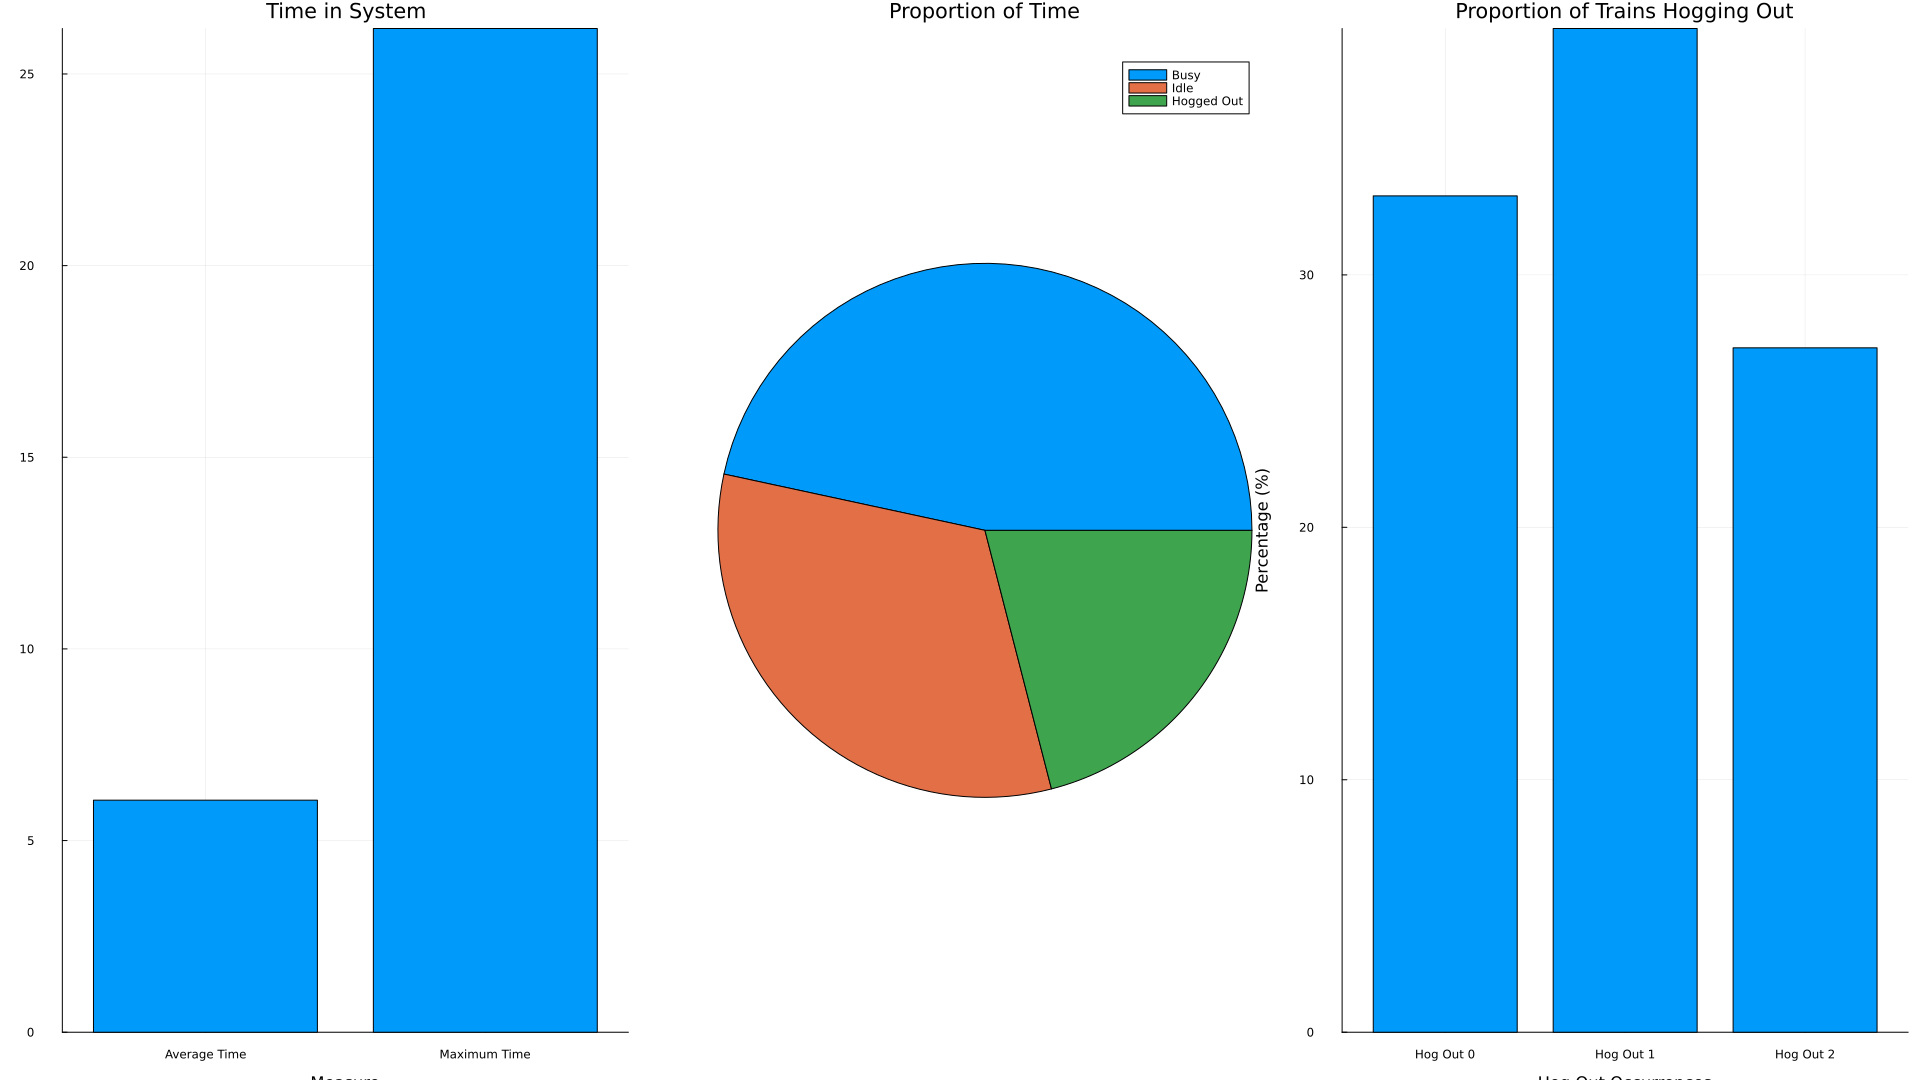

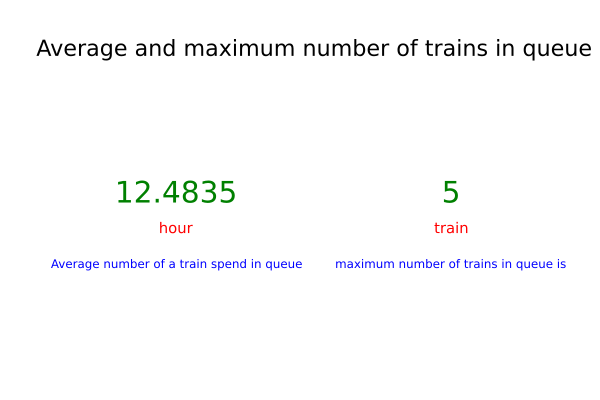

In [ ]:
sim_train()